<a href="https://colab.research.google.com/github/vicotrbb/machine_learning/blob/master/projects/video_analyzer/text_quality_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text quality evaluation using text indicators

The idea here is to create a way to classify and score the quality of a input text, article, news, video speech and so on.

To achieve such goal, I think the best way will be create a dataset with loads of texts quality indicators, metadata and classifing labels, like: 'Good', 'bad', 'reasonable' etc.

This dataset will be loaded together with the evaluation tool and used to perform a simple linear regression with the input text indicators.


## Extraction of text quality indicators

Extracted from **Cornelia Kiefer** paper: **Quality Indicators for Text Data**

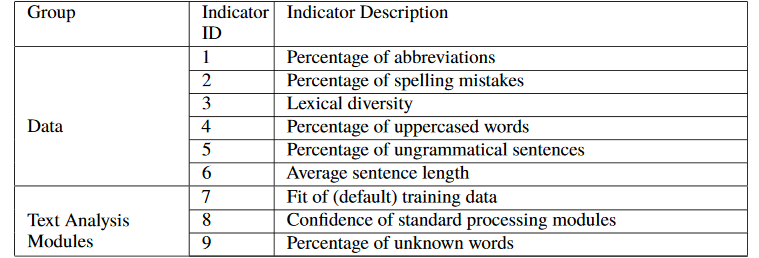

In [1]:
text = """I got a lot of questions about programming but i don't think they're the right questions to ask questions like. How many languages do i need to learn what language do i need to learn to get to company x what's the difference between a and b and which makes more money what are the exact steps i need to take. To become the. What kind of program should i write to build up my resume so why don't i like these questions because it feels like the people who are asking these questions they are learning how to program just for the sake of learning how to program. The program is just a tool. Being a programmer for me means you write code to automate things. Or to make things perform certain actions for example programming a refrigerator to turn on the light when you open the door. When you think about it. Programming is actually kind of boring. You're just giving a series of instructions to a machine over and over again until you get it right i don't want to speak for all of you. But i think it's a pay wasn't great i don't think a lot of you would spend hours and hours every night in front of the computer trying to learn how to code or to just debug your program sometimes we get caught up learning languages or doing coding challenges or fantasizing about you not working for these big tech companies that we forget why we wanted to learn programming in the first place. You wanted to program because you saw the amazing things that can be built using programming. So don't just learn how to program build something that matters build something that means something to you build something that solves a problem you're a problem solver a creator an innovator you're not a programmer programming is just a tool in your arsenal to build something amazing. You can be analytical trade of empathetic and programming allows you to express those qualities of yourself but programming in of itself is nothing special it's like a pencil it can mark stuff down if you press on the pencil hard enough. That's it but with a pencil you can write novels draw beautiful portraits build plans for a skyscraper or anything limited only by your imagination. You don't learn how to program to get into google. You learn how to program to build something meaningful something that helps real people with real problems i'm partnered of ibm today to talk about a global initiative called call for code which calls for developers to build something impactful and have a positive change across the world through their code as you know there are hundreds and hundreds of natural disasters every year like hurricanes and earthquakes floods volcanoes and wildfires those affect numerous lies and causes tremendous damage to many families around the world if you strive for real impact we desperately need you this is why 2018 call for code global challenge is a competition that ass people like you to build solutions to improve what we can do to reduce the destructive impact of his natural disasters we need all kinds of technologies."""

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.add('.')
stopwords_text = [word for word in text.split(' ') if word not in stopwords_set]
is_stopwords_text = [word for word in text.split(' ') if word in stopwords_set]

## Text implicit attributes


In [16]:
text_size = len(text)
text_words_number = len(text.split(' '))
text_uniques_number = len(set(stopwords_text))
text_sentences_number = len(text.split('.'))
number_stopwords = len(set(is_stopwords_text))
lexical_diversity = len(set(stopwords_text)) / len(stopwords_text) * 100

In [17]:
text_tokens = text.split(' ')
text_words_len = 0

for t in text_tokens:
  text_words_len += len(t)

avarage_sentence_len = text_words_len / len(text_tokens)

In [20]:
print('text size: ', text_size)
print('text number of words: ', text_words_number)
print('text number of unique words(not stopwords): ', text_uniques_number)
print('text number of stopwords: ', number_stopwords)
print('text number of sentences(splited by .): ', text_sentences_number)
print('Lexical diversity {:.2f}%'.format(lexical_diversity))
print('Avarage senteces length {:.2f}'.format(avarage_sentence_len))

text size:  3001
text number of words:  540
text number of unique words(not stopwords):  194
text number of stopwords:  66
text number of sentences(splited by .):  1
Lexical diversity 69.04%
Avarage senteces length 4.56


## Percentage of abbreviations

# Percentage of spelling mistakes




In [6]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 12.8MB/s 


In [7]:
from spellchecker import SpellChecker

In [8]:
text = text.replace(".", "")

In [9]:
spell = SpellChecker()
spell.word_frequency.load_words(["google", r"\w+'\w+", "debug"])

misspelled = spell.unknown(stopwords_text)

In [10]:
len(misspelled)

22

In [11]:
misspelled

{'amazing.',
 'boring.',
 'door.',
 'enough.',
 'google.',
 "i'm",
 'imagination.',
 'impactful',
 'like.',
 'place.',
 'program.',
 'programming.',
 'take.',
 'technologies.',
 "that's",
 'the.',
 "they're",
 'tool.',
 "what's",
 'wildfires',
 "you're",
 'you.'}

## Percentage of ungrammatical sentences 

# Readability

* https://en.wikipedia.org/wiki/Readability
* https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
* https://en.wikipedia.org/wiki/SMOG
* https://en.wikipedia.org/wiki/Gunning_fog_index

## Flesch reading ease

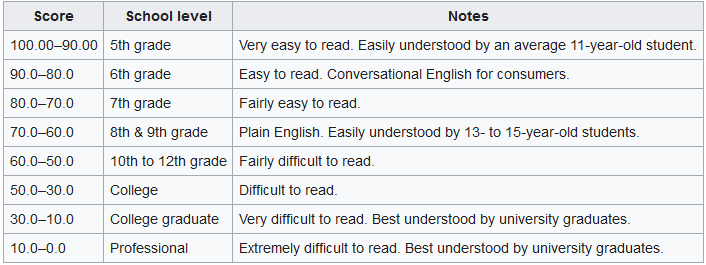

"In the Flesch reading-ease test, higher scores indicate material that is easier to read; lower numbers mark passages that are more difficult to read. The formula for the Flesch reading-ease score (FRES):"

$206.835 - 1.015(\frac{total words}{total sentences}) - 84.7(\frac{total syllables}{total words})$

This metric aims to measure how easy is to read a text.

## Flesch–Kincaid grade level

"These readability tests are used extensively in the field of education. The "Flesch–Kincaid Grade Level Formula" instead presents a score as a U.S. grade level, making it easier for teachers, parents, librarians, and others to judge the readability level of various books and texts. It can also mean the number of years of education generally required to understand this text, relevant when the formula results in a number greater than 10. The grade level is calculated with the following formula:"

$ 0.39(\frac{total words}{total sentences}) + 11.8(\frac{total syllables}{total words}) - 15.59$


## SMOG

"The SMOG grade is a measure of readability that estimates the years of education needed to understand a piece of writing. SMOG is an acronym for 'Simple Measure of Gobbledygook'."

To calculate SMOG
1. Count a number of sentences (at least 30)
2. In those sentences, count the polysyllables (words of 3 or more syllables).
3. Calculate using:

$grade = 1.0430\sqrt{number of polysyllables * \frac{30}{number of sentences}} + 3.1291$ 

## Gunning fog index

"In linguistics, the Gunning fog index is a readability test for English writing. The index estimates the years of formal education a person needs to understand the text on the first reading. For instance, a fog index of 12 requires the reading level of a United States high school senior (around 18 years old). The test was developed in 1952 by Robert Gunning, an American businessman who had been involved in newspaper and textbook publishing."

The Gunning fog index is calculated with the following algorithm:
1. Select a passage (such as one or more full paragraphs) of around 100 words. Do not omit any sentences;
2. Determine the average sentence length. (Divide the number of words by the number of sentences.);
3. Count the "complex" words consisting of three or more syllables. Do not include proper nouns, familiar jargon, or compound words. Do not include common suffixes (such as -es, -ed, or -ing) as a syllable;
4. Add the average sentence length and the percentage of complex words; and
5. Multiply the result by 0.4.

Complete formula:

$0.4\left [\left ( \frac{words}{sentences} \right ) + 100\left ( \frac{complex words}{words} \right ) \right ]$


**Limitations**

While the fog index is a good sign of hard-to-read text, it has limits. Not all complex words are difficult. For example, "interesting" is not generally thought to be a difficult word, although it has three syllables (after omitting the common -ing suffix). A short word can be difficult if it is not used very often by most people. The frequency with which words are in normal use affects the readability of text.